# COVID-19 analysis in London


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1.1: Reporting number of COVID-19 cases in each London local authority  (2 marks)
First, read the “cases.csv” dataset into a dataframe. Create a new dataframe where rows are the unique names of London local authorities and the columns are the total number of covid cases in each London local authority (include both count columns in the starting dataframe).

In [23]:
df_pp = pd.read_csv('C:/Users/qiankj/Desktop/coursework2/data_for_part1/population.csv')
#read csv
df_cs = pd.read_csv('C:/Users/qiankj/Desktop/coursework2/data_for_part1/cases.csv')
#new dataframe
df_cs_ac = df_cs[['Local authority','covid_19_deaths']]
df_cs_ac['covid_19_deaths_per_thousand'] = df_pp['total_population_mid_2018'].mul(df_cs['covid_19_deaths_per_thousand']).div(1000)

D:\Asoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [24]:
#group by each Local authority
grp_la=df_cs_ac.groupby(['Local authority'],as_index=False)
#Sum the cases
df_ca = grp_la[['covid_19_deaths','covid_19_deaths_per_thousand']].agg(np.sum)

df_ca

,Local authority,covid_19_deaths,covid_19_deaths_per_thousand
0,Barking and Dagenham,103,103.0
1,Barnet,287,287.0
2,Bexley,125,125.0
3,Brent,304,304.0
4,Bromley,152,152.0
5,Camden,91,91.0
6,City of London,3,3.0
7,Croydon,252,252.0
8,Ealing,239,239.0
9,Enfield,220,220.0


### 1.2: Calculating percentage of COVID-19 cases in each London local authority (2 marks)
Read the “population.csv” dataset and calculate the percentage of covid cases in each city of London region according to the total population and add it as a new column to the datafame. Sort the dataframe according to this column.


In [25]:
#read csv
df_pp = pd.read_csv('C:/Users/qiankj/Desktop/coursework2/data_for_part1/population.csv')
df_pp.head()

grp_ttl=df_pp.groupby(['Local authority'],as_index=False)
#Sum the cases
total_p = grp_ttl['total_population_mid_2018'].agg(np.sum)
#calculate the percentage of covid cases
total_p['percentage of covid cases'] = df_ca['covid_19_deaths'].div(total_p['total_population_mid_2018'], axis=0)
#creat a new column
df_ca['Percentage of covid cases(%)']=total_p['percentage of covid cases']
#sort value
df_ca=df_ca.sort_values(by=['Percentage of covid cases(%)'],ascending=True)
#change into "%"
df_ca['Percentage of covid cases(%)'] = df_ca['Percentage of covid cases(%)'].apply(lambda x: x*100)
print(df_ca.head())

         Local authority  covid_19_deaths  covid_19_deaths_per_thousand  \
20  Kingston upon Thames               57                          57.0   
6         City of London                3                           3.0   
5                 Camden               91                          91.0   
18             Islington               88                          88.0   
26  Richmond upon Thames               77                          77.0   

    Percentage of covid cases(%)  
20                      0.032484  
6                       0.034459  
5                       0.034703  
18                      0.036798  
26                      0.039105  


### 1.3: Finding the largest and smallest population based on ethnicity group in each city of London (3 marks)

Read the “ethnic.csv” dataset and calculate the population of different ethnicity groups in each London borough using column “total\_population\_mid\_2018” from the first dataset “cases.csv”. Plot a bar chart to compare cases in each ethnicity group for each London local authority.

In [26]:
#import data
df_et = pd.read_csv('C:/Users/qiankj/Desktop/coursework2/data_for_part1/ethnic.csv')

        Local Authority  all_bame_population  all_black_population  \
0  Barking and Dagenham                89023                 42367   
1                Barnet               142489                 30558   
2                Bexley                45445                 21469   
3                 Brent               212065                 62885   
4               Bromley                52610                 20397   

   pakistani_or_bangladeshi_population  all_indian_population  
0                                18185                   8654  
1                                 8526                  31026  
2                                 1597                   7512  
3                                17217                  62184  
4                                 2432                   6666  


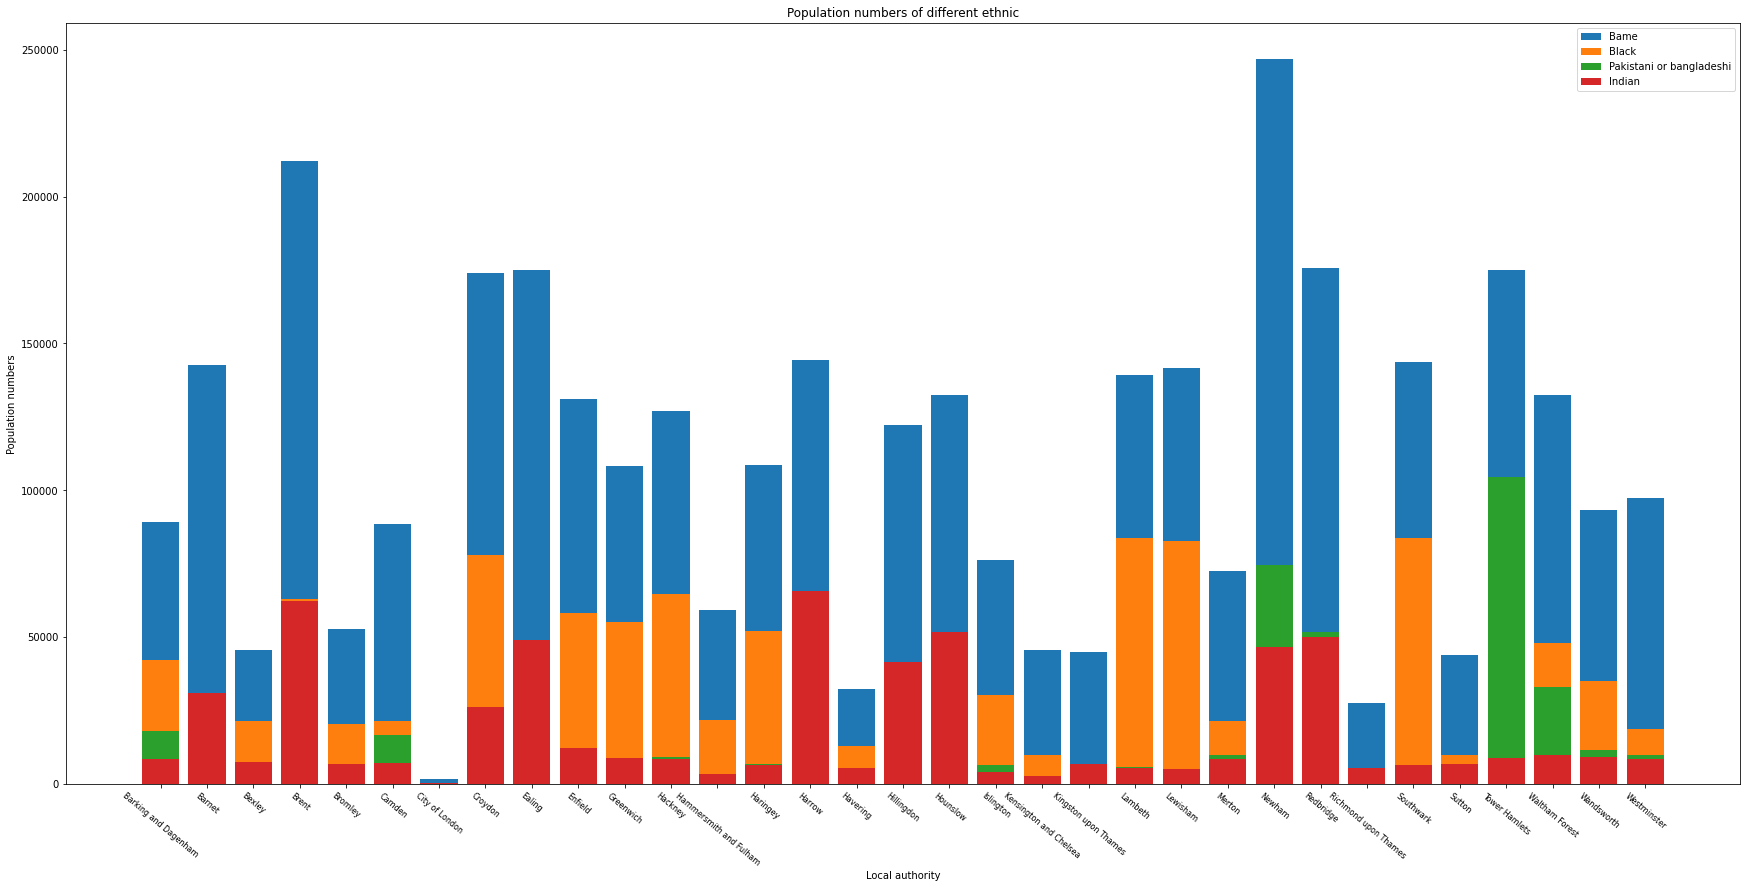

In [27]:
#BAME population
df_et['all_bame_population']=df_et['all_bame_prop'].mul(df_pp['total_population_mid_2018']).astype("int")

#Black population
df_et['all_black_population']=df_et['all_black_prop'].mul(df_pp['total_population_mid_2018']).astype("int")

#Pakistani or bangladeshi population
df_et['pakistani_or_bangladeshi_population']=df_et['pakistani_or_bangladeshi_prop'].mul(df_pp['total_population_mid_2018']).astype("int")

#Indian population
df_et['all_indian_population']=df_et['all_indian_prop'].mul(df_pp['total_population_mid_2018']).astype("int")

pp_et = df_et.groupby(["Local Authority"],as_index=False)
df_pp_et = pp_et[['all_bame_population','all_black_population',
                 'pakistani_or_bangladeshi_population','all_indian_population']].aggregate(np.sum)

print(df_pp_et.head())
#Plotting
fig = plt.figure(figsize=(30,14))
plot_X = df_pp_et["Local Authority"]
plot_Y_bame = df_pp_et["all_bame_population"]
plot_Y_black = df_pp_et["all_black_population"]
plot_Y_pb = df_pp_et["pakistani_or_bangladeshi_population"]
plot_Y_indian = df_pp_et["all_indian_population"]
#bame
plt.bar(plot_X,plot_Y_bame)
#black
plt.bar(plot_X,plot_Y_black)
#pakistani_or_bangladeshi
plt.bar(plot_X,plot_Y_pb)
#indian
plt.bar(plot_X,plot_Y_indian)
plt.title("Population numbers of different ethnic")
plt.legend(["Bame","Black","Pakistani or bangladeshi","Indian"])
plt.xlabel('Local authority')
plt.ylabel('Population numbers')
plt.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=-40)
plt.show()

### 1-4: Analysing the medical conditions of each region (3 marks)
Read the “medical.csv” dataset. Calculate total percentage of patients with “Hypertension”, “Obesity (18+)”, “Diabetes”, “Asthma”, and “Coronary heart disease” for each London local authority. For each medical condition, draw a boxplot of medical case frequencies for the 5 regions with the highest "total\_registered\_patient". Then, add a new column to the daraframe from section 1.2 to show the medical conditions with the highest number patients in each London borough.  

In [28]:
#import data
df_md = pd.read_csv('data_for_part1/medical.csv')
df_md.head()
ls=['Hypertension','Obesity (18+)','Diabetes','Asthma','Coronary heart disease']

for i in ls:
    df_md[i]=df_md[i].div(100)
    df_md[i]=df_md['total_registered_patients'].mul(df_md[i])
#group by each Local authority
print(df_md.head())

grp_md=df_md.groupby(['Local authority'],as_index=False)
#Sum the cases
df_md_fre = grp_md[['total_registered_patients','Hypertension','Obesity (18+)','Diabetes','Asthma','Coronary heart disease']].agg(np.sum)
df_md_pre = grp_md[['total_registered_patients','Hypertension','Obesity (18+)','Diabetes','Asthma','Coronary heart disease']].agg(np.sum)

#precentage of patients
for i in ls:
    df_md_pre[i] = df_md_pre[i].div(df_md_pre['total_registered_patients'], axis=0)
print(df_md_pre.head())


    MSOA11CD                  MSOA11NM       Local authority  \
0  E02000001        City of London 001        City of London   
1  E02000002  Barking and Dagenham 001  Barking and Dagenham   
2  E02000003  Barking and Dagenham 002  Barking and Dagenham   
3  E02000004  Barking and Dagenham 003  Barking and Dagenham   
4  E02000005  Barking and Dagenham 004  Barking and Dagenham   

   total_registered_patients  Hypertension  Obesity (18+)  Diabetes    Asthma  \
0                       8584      682.4280       310.7408  231.7680  264.3872   
1                       8315      769.9690       511.3725  414.9185  325.1165   
2                      11873     1226.4809       902.3480  687.4467  550.9072   
3                       6852      639.9768       572.8272  339.1740  245.3016   
4                      11150     1044.7550       980.0850  574.2250  474.9900   

   Coronary heart disease  
0                128.7600  
1                156.3220  
2                217.2759  
3               

   Local authority  total_registered_patients  Hypertension  Obesity (18+)  \
1           Barnet                     425715         44791          21368   
24          Newham                     409032         37021          29372   
3            Brent                     405143         43362          23974   
31      Wandsworth                     394179         28095          15740   
21         Lambeth                     390904         33025          20255   

    Diabetes  Asthma  Coronary heart disease  
1      20060   16875                    9356  
24     23876   15850                    6185  
3      24993   15609                    7321  
31     12195   14605                    4592  
21     16376   15832                    4314  


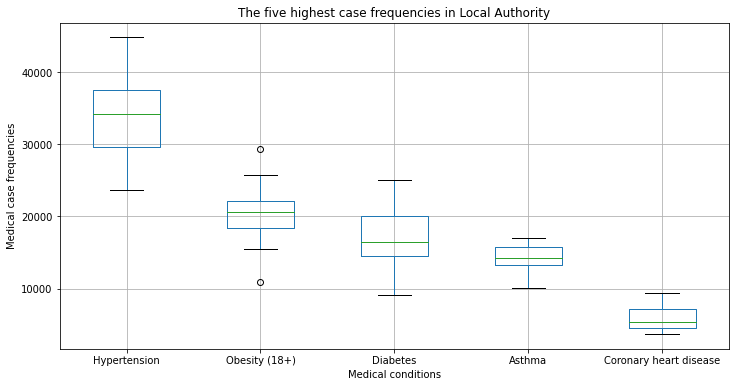

In [29]:
#Plot a boxplot
#data type into integars
df_md_fre[ls]=df_md_fre[ls].astype("int")
#Sort value without ascending
df_md_fre=df_md_fre.sort_values(by=['total_registered_patients'],ascending=False)
#Select 5 regions with the highest total_registered_patients
df_fv_rg=df_md_fre.loc[1:5]
df_fv_plt=df_fv_rg[ls]
print(df_fv_rg.head())
#Boxplot
plt.figure(figsize=(12, 6))
df_fv_plt.boxplot()
plt.xlabel('Medical conditions')
plt.title("The five highest case frequencies in Local Authority")
plt.ylabel('Medical case frequencies')
plt.show()

In [30]:
#Medical conditions with the highest number patients in each London borough.
#Founction to find the name of the column
def find_colname(row):
    dict = []
    if row["the highest medical conditions"] == row["Hypertension"]:
        dict.append("Hypertension")
    elif row["the highest medical conditions"] == row["Obesity (18+)"]:
        dict.append("Obesity (18+)")
    elif row["the highest medical conditions"] == row["Diabetes"]:
        dict.append("Diabetes")
    elif row["the highest medical conditions"] == row["Asthma"]:
        dict.append("Asthma")
    return dict

#find the name of medical conditions
df_md_fre["the highest medical conditions"] = df_md_fre.apply(lambda x: max(x["Hypertension"],x["Obesity (18+)"],x["Diabetes"],x["Asthma"]),axis=1)

df_md_fre["medical conditions"] = df_md_fre.apply(lambda x:find_colname(x),axis=1)
df_md_fre["medical conditions"] = [i for j in df_md_fre['medical conditions']for i in j]
#add a new column to the dataframe from section 1.2: df_ca
df_ca["the highest medical conditions"] = df_md_fre["medical conditions"]
print(df_ca.head())

         Local authority  covid_19_deaths  covid_19_deaths_per_thousand  \
20  Kingston upon Thames               57                          57.0   
6         City of London                3                           3.0   
5                 Camden               91                          91.0   
18             Islington               88                          88.0   
26  Richmond upon Thames               77                          77.0   

    Percentage of covid cases(%) the highest medical conditions  
20                      0.032484                   Hypertension  
6                       0.034459                   Hypertension  
5                       0.034703                   Hypertension  
18                      0.036798                   Hypertension  
26                      0.039105                   Hypertension  
